In [7]:
from data_generator import batch_data_generator
import numpy as np
from imgaug.augmentables.segmaps import SegmentationMapsOnImage 

In [2]:
import matplotlib.pyplot as plt
def show_all(images):
    cols = 4
    size =images.shape[0]
    rows = size//cols + (1 if (size%cols)>0 else 0)

    _, axs = plt.subplots(rows, cols, figsize=(12, 12))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.imshow(img)
    plt.show()

In [76]:
# for Gunpowder
ZARR_FOLDER = '/tf/data/cells/raw/zarr/train/'
gp_batch_size= 6
gp_voxel_shape = [1,1,1]
gp_input_shape= [572, 572,4]
gp_output_shape = [572, 572,4]
# gp_output_shape = [ 388, 388,3]

In [77]:
gen_train_fast = batch_data_generator(ZARR_FOLDER, batch_size=gp_batch_size
                                              ,voxel_shape = gp_voxel_shape,
                                              input_shape= gp_input_shape,
                                              output_shape = gp_output_shape,without_background=True )
images,masks = next(gen_train_fast)

In [78]:
print(images.shape)
print(masks.shape)
print(images.min())
print(images.max())
# images = images.astype(np.int16)
# print(im.max())
# print(im.min())

(6, 572, 572, 4)
(6, 572, 572, 3)
0.003921569
1.0


In [79]:
vis = np.concatenate((images, masks), axis=3)

In [83]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
# images = np.array(
#     [ia.quokka(size=(64, 64)) for _ in range(32)],
#     dtype=np.uint8
# )

sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq =  iaa.Sequential([

            iaa.Fliplr(0.5),

            iaa.Flipud(0.5),

            iaa.Affine(rotate=(-45, 45)),  # rotate by -45 to 45 degrees (affects segmaps)

            sometimes(iaa.MotionBlur(k=5)),

            sometimes(iaa.Affine(

            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis

            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)

            rotate=(-45, 45), # rotate by -45 to +45 degrees

            shear=(-16, 16), # shear by -16 to +16 degrees

            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)

            cval=(0, 0), # if mode is constant, use a cval between 0 and 255

            mode='constant' # use any of scikit-image's warping modes (see 2nd image from the top for examples)

        )),

        iaa.ElasticTransformation(alpha=(0, 1.0), sigma=0.8),

        ], random_order=False)
images_aug = seq(images=vis)
# images_aug = np.asarray(images_aug)

In [84]:
images_aug.shape

(6, 572, 572, 7)

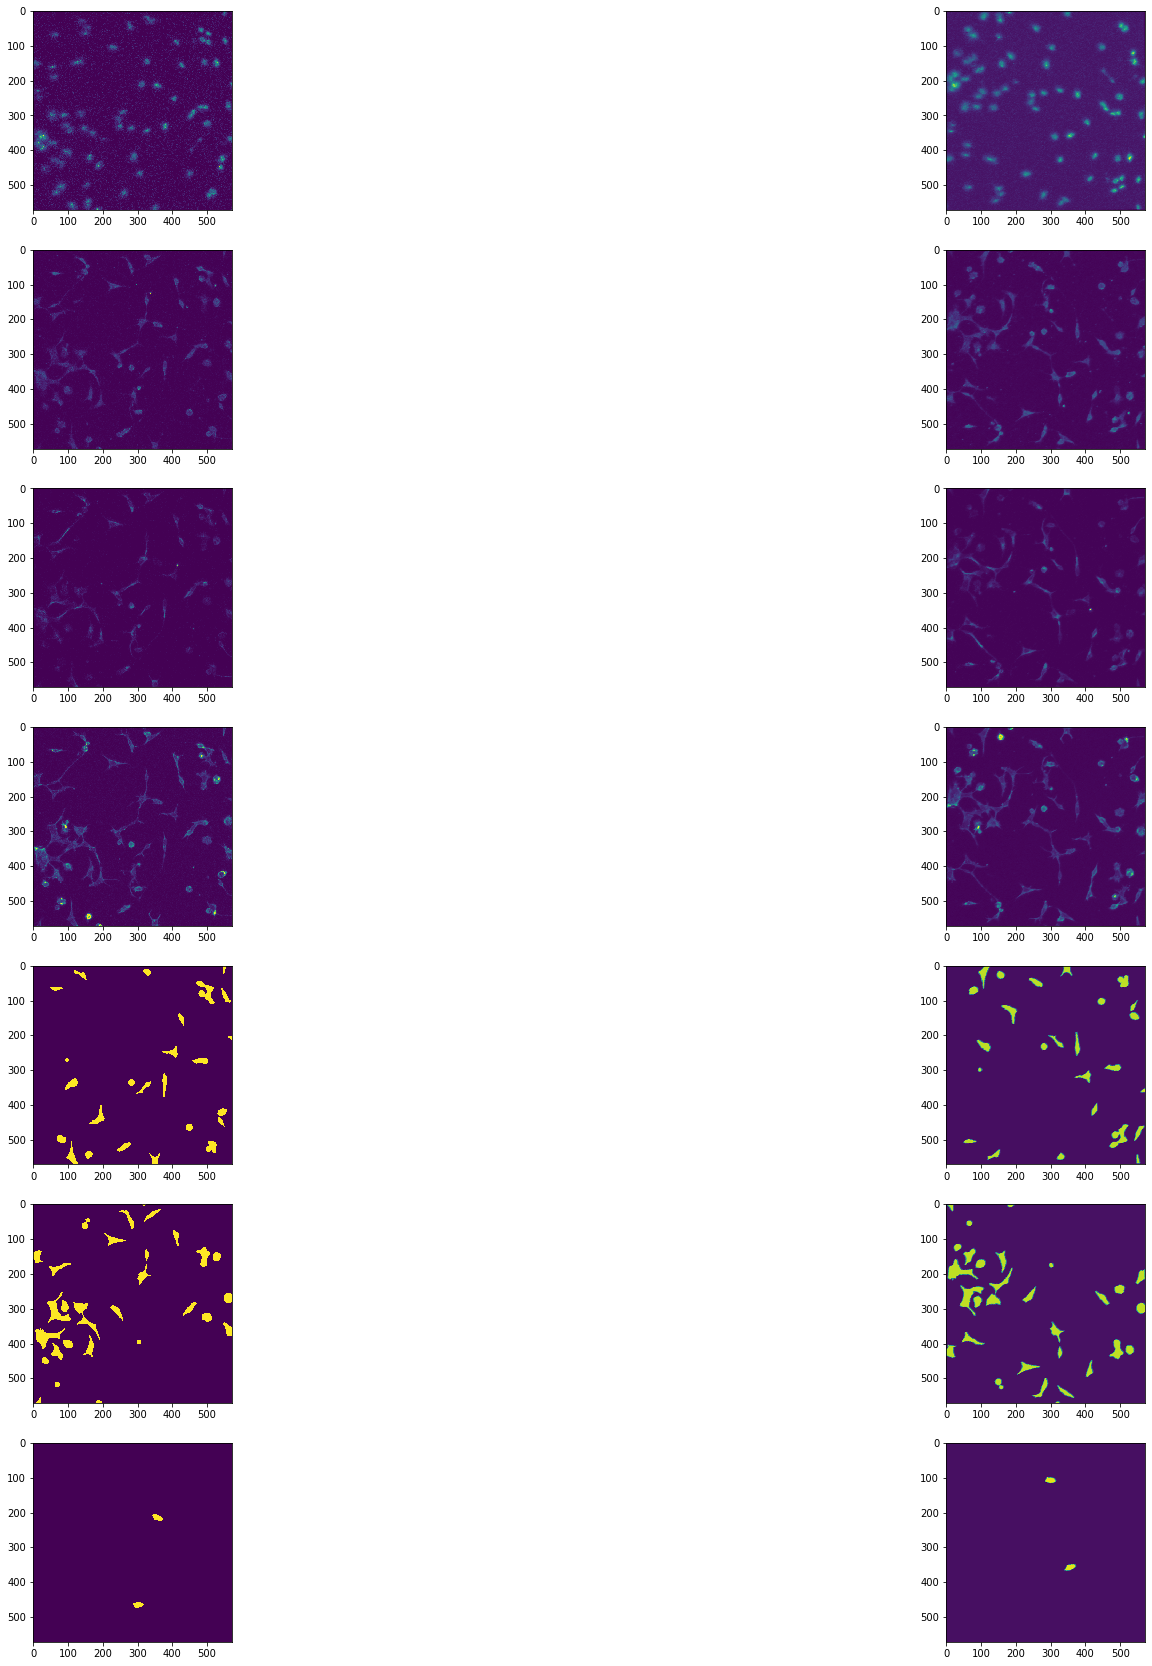

In [85]:
import matplotlib.pyplot as plt
def show_all(im1,im2):
#     fig = plt.figure(figsize=(200, 200))
    cols = 2
    size =im1.shape[2]
    f, axarr = plt.subplots(size,cols, figsize=(30,30))
    for i in range(size):
#         print(i)
#         print(im1.shape)
#         print(im2.shape)
        axarr[i,0].imshow(im1[:,:,i])
        axarr[i,1].imshow(im2[:,:,i])

    plt.show()
show_all(vis[0],images_aug[0])

In [16]:
np.unique(mask_aug.draw()[0][:,:,0])

array([  0,  60, 230], dtype=uint8)

In [27]:
images_aug.shape

(572, 572, 3)

In [48]:
im.min()

1

In [137]:
shape = image.shape[:2] + tuple([3])
shape

(572, 572, 3)

In [156]:
x = mask_aug.draw()

In [139]:
for i in x:
    print(i.shape)

(572, 572, 3)
(572, 572, 3)
(572, 572, 3)
(572, 572, 3)


In [157]:
len(x[])

1

In [158]:
x[0].shape

(572, 572, 3)